In [2]:
# Beginnin of weather.ipynb
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weatherkey}&units={units}&q="
response = requests.get(query_url+"chicago").json()

# Test the response
response

{'coord': {'lon': -87.62, 'lat': 41.88},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 69.19,
  'pressure': 1022,
  'humidity': 40,
  'temp_min': 66.99,
  'temp_max': 71.01},
 'visibility': 16093,
 'wind': {'speed': 12.75, 'deg': 290, 'gust': 20.8},
 'clouds': {'all': 1},
 'dt': 1570476309,
 'sys': {'type': 1,
  'id': 4505,
  'message': 0.01,
  'country': 'US',
  'sunrise': 1570449208,
  'sunset': 1570490578},
 'timezone': -18000,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [5]:
# create empty lists for the selective data to go into 
city = []
country = []
date = []
lat = []
lon = []
maxtemp = []
mintemp = []
clouds = []
wind = []
humidity = []

# loop through the cities in the city list created in the second section
for c in cities:  
    list_data = requests.get(query_url+c).json()
    try: 
        # After each call, if there is data available, append the data to the empty lists created
        city.append(list_data["name"])
        country.append(list_data["sys"]["country"])       
        date.append(list_data["dt"]) 
        lat.append(list_data["coord"]["lat"])
        lon.append(list_data["coord"]["lon"])
        maxtemp.append(list_data["main"]["temp_max"])
        mintemp.append(list_data['main']['temp_min'])
        clouds.append(list_data["clouds"]["all"])
        wind.append(list_data["wind"]["speed"])
        humidity.append(list_data["main"]["humidity"])
        print(list_data['name'])
        
        # Wait a second in between calls in loop to not exceed call limit
        time.sleep(0.50)
        
    # When a city has insufficient data, print insufficient data
    except:
        print('Insufficient data found for:',c)


East London
Abeche
Insufficient data found for: saleaula
Vrhnika
Sloboda
Atuona
Ushuaia
Rome
Nikolskoye
Ulaanbaatar
Bandarbeyla
Saint-Philippe
Bambous Virieux
Albany
Ancud
Hithadhoo
Bredasdorp
Mar del Plata
Shellbrook
Vestmanna
Nanortalik
Port Blair
Dongkan
Port Alfred
Aasiaat
Saquena
Tuatapere
Mackay
Sao Filipe
Iqaluit
Nueva Concepcion
Rikitea
Kapaa
Mount Isa
Mogapi
Vaini
Sao Felix do Xingu
Ponta Delgada
Esperance
Ilulissat
Insufficient data found for: tawkar
Pyra
Shelburne
Kenora
Zaraza
Cherskiy
Yellowknife
Jamestown
Saskylakh
Punta Arenas
Koumac
Miracatu
Beloha
Kikwit
Havelock
Mundo Nuevo
Alamogordo
Kavaratti
Neiafu
Tautira
Insufficient data found for: taolanaro
Kandrian
Insufficient data found for: marcona
Praia
Saldanha
Insufficient data found for: zlatoustovsk
Cortez
Leningradskiy
San Andres
Tasiilaq
Insufficient data found for: illoqqortoormiut
Axim
Iskateley
Hermanus
Makat
Busselton
Cabo San Lucas
Souillac
Hilo
Mpulungu
Klaksvik
Mataura
Avarua
Kruisfontein
Tateyama
Ritchie
Kame

In [6]:
# Create dictionary of data to convert to dataframe
data_dictionary = {'Country': country,
                  'City': city,
                  'Date': date,
                   'Latitude': lat,
                   'Longitude': lon,
                   'High Temp': maxtemp,
                   'Low Temp': mintemp,
                   'Overcast': clouds,
                   'Wind': wind,
                   'Humidity': humidity
                  }
data_df = pd.DataFrame(data_dictionary)

data_df.head()

,Country,City,Date,Latitude,Longitude,High Temp,Low Temp,Overcast,Wind,Humidity
0,ZA,East London,1570476307,-33.02,27.91,60.80,60.80,0,10.29,93
1,TD,Abeche,1570476473,13.83,20.83,74.75,74.75,99,17.18,79
2,SI,Vrhnika,1570476474,45.96,14.30,59.00,39.99,75,10.29,70
3,UA,Sloboda,1570476474,48.46,24.82,30.20,30.20,0,2.24,92
4,PF,Atuona,1570476322,-9.80,-139.03,79.43,79.43,47,13.15,70


In [7]:
# run a quick count of all the columns to make sure that each city has complete data sets
data_df.count()

Country      556
City         556
Date         556
Latitude     556
Longitude    556
High Temp    556
Low Temp     556
Overcast     556
Wind         556
Humidity     556
dtype: int64

In [8]:
# checking to make sure its at least 500 unique cities

len(data_df['City'].unique())

556

In [9]:
# send to csv file in my resources folder 
data_df.to_csv('../Resources/weatherpy.csv')

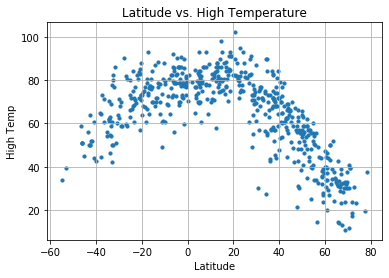

In [10]:
# temperature vs latitude scatter plot

plt.scatter(data_df["Latitude"], data_df["High Temp"], s=10)

plt.title("Latitude vs. High Temperature")
plt.ylabel("High Temp")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Pretty simple analysis. 
# The temperature spikes around the equator and tapers off as you approach the northern and southern poles

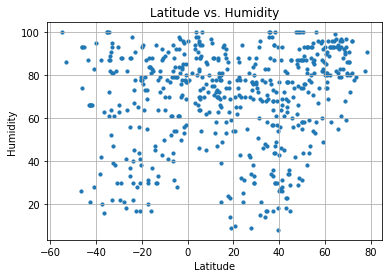

In [11]:
# Latitude vs humidity

plt.scatter(data_df["Latitude"], data_df["Humidity"], s=10)

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Really no distinct correlation between the two but it seems as though, in general, the cities pulled were 
# more humid than not.

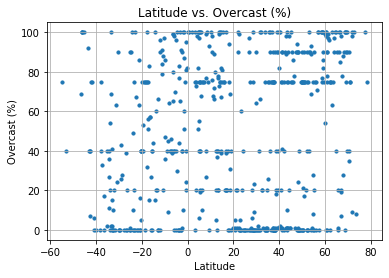

In [12]:
# cloudiness vs latitude

plt.scatter(data_df["Latitude"], data_df["Overcast"], s=10)

plt.title("Latitude vs. Overcast (%)")
plt.ylabel("Overcast (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Again, no real correlation but there are clusters of plots along certain levels. This might speak to the way the data is
# compiled. Maybe the cloudiness metric favors increments of 5 (e.g. the clusters surrounding 20%, 40%, 85% and 100%)

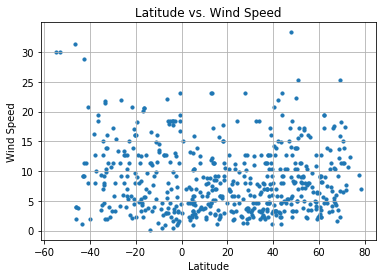

In [13]:
# Wind speed vs latitude

plt.scatter(data_df["Latitude"], data_df["Wind"], s=10)

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# No real correlation but winds between 0 and 10 mph seem to be the most frequent

In [14]:
# create function to determine which hemisphere a city is in then make it a new column

def h(row):
    if row['Latitude'] > 0:
        return 'Northern'
    else:
        return 'Southern'

data_df['Hemisphere'] = data_df.apply(h, axis=1)

data_df.head()

,Country,City,Date,Latitude,Longitude,High Temp,Low Temp,Overcast,Wind,Humidity,Hemisphere
0,ZA,East London,1570476307,-33.02,27.91,60.80,60.80,0,10.29,93,Southern
1,TD,Abeche,1570476473,13.83,20.83,74.75,74.75,99,17.18,79,Northern
2,SI,Vrhnika,1570476474,45.96,14.30,59.00,39.99,75,10.29,70,Northern
3,UA,Sloboda,1570476474,48.46,24.82,30.20,30.20,0,2.24,92,Northern
4,PF,Atuona,1570476322,-9.80,-139.03,79.43,79.43,47,13.15,70,Southern


In [15]:
northern_df = data_df[data_df['Hemisphere'] == 'Northern']
southern_df = data_df[data_df['Hemisphere'] == 'Southern']

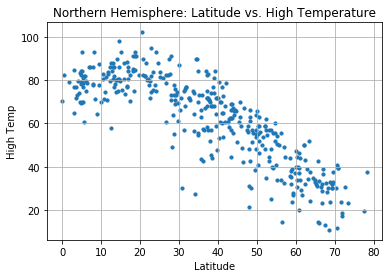

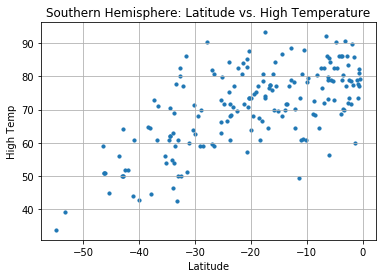

In [16]:
# Isolated hemisphere analysis: temperature vs latitude scatter plot

plt.scatter(northern_df["Latitude"], northern_df["High Temp"], s=10)

plt.title("Northern Hemisphere: Latitude vs. High Temperature")
plt.ylabel("High Temp")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#######################################################################

plt.scatter(southern_df["Latitude"], southern_df["High Temp"], s=10)

plt.title("Southern Hemisphere: Latitude vs. High Temperature")
plt.ylabel("High Temp")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# Basically just cut the aggregate scatter plot down the middle at '0' and isolated that half of the chart.
# No change in the analysis; temp is higher at equator

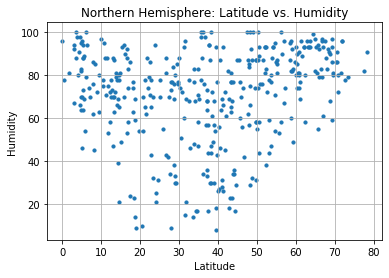

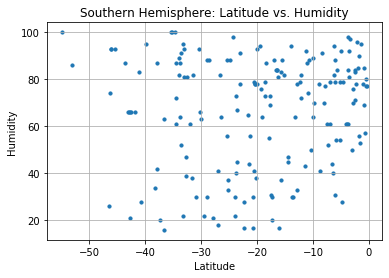

In [17]:
# Isolated hemisphere analysis: Latitude vs humidity

plt.scatter(northern_df["Latitude"], northern_df["Humidity"], s=10)

plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

################################################################

plt.scatter(southern_df["Latitude"], southern_df["Humidity"], s=10)

plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
# Really no distinct correlation between the two but it seems as though, in general, the cities pulled were 
# more humid than not. I am starting to notice that my API calls took more northern hemisphere cities.

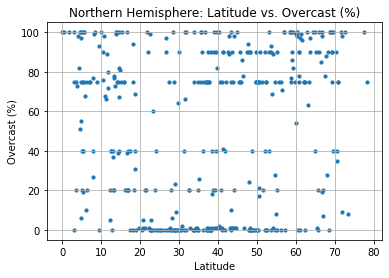

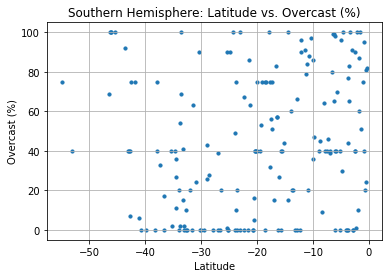

In [18]:
#Isolated hemisphere analysis: cloudiness vs latitude

plt.scatter(northern_df["Latitude"], northern_df["Overcast"], s=10)

plt.title("Northern Hemisphere: Latitude vs. Overcast (%)")
plt.ylabel("Overcast (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

############################################################

plt.scatter(southern_df["Latitude"], southern_df["Overcast"], s=10)

plt.title("Southern Hemisphere: Latitude vs. Overcast (%)")
plt.ylabel("Overcast (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
# Again, no real correlation but there are clusters of plots along certain levels. This might speak to the way the data is
# compiled. Maybe the cloudiness metric favors increments of 5 (e.g. the clusters surrounding 20%, 40%, 85% and 100%)

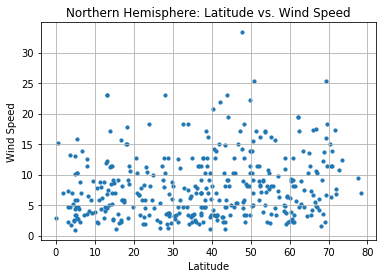

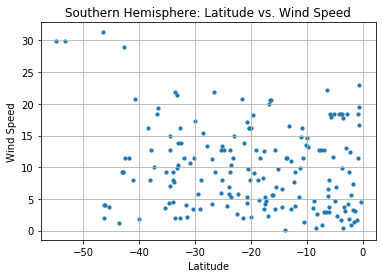

In [19]:
# Isolated hemisphere analysis Wind speed vs latitude

plt.scatter(northern_df["Latitude"], northern_df["Wind"], s=10)

plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#########################################################

plt.scatter(southern_df["Latitude"], southern_df["Wind"], s=10)

plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

# No real correlation but winds between 0 and 10 mph seem to be the most frequent